# Installing Required Libraries

In [ ]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

# Downloading Real Stock Data

In [3]:
import yfinance as yf
import pandas as pd

# Download stock data
data = yf.download('AAPL', start='2018-01-01', end='2025-12-31')
data = data[['Close']]
data.dropna(inplace=True)
data.tail()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2025-04-15,202.139999
2025-04-16,194.270004
2025-04-17,196.979996
2025-04-21,193.160004
2025-04-22,199.740005


# Preparing Data for Deep Learning

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize prices to [0, 1]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Create sequences
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_dataset(scaled, window_size)

# Reshape for deep learning model input
X = X.reshape((X.shape[0], X.shape[1], 1))


# Building the Deep Learning Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(100, return_sequences=False),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 58, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,785 (284.32 KB)

 Trainable params: 72,785 (284.32 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [14]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=32)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0475 - val_loss: 9.6972e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6967e-04 - val_loss: 6.4210e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1752e-04 - val_loss: 5.9399e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4018e-04 - val_loss: 6.6194e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5379e-04 - val_loss: 5.1887e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9696e-04 - val_loss: 4.7471e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0211e-04 - val_loss: 7.3635e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8080e-04 - val_loss: 6.1152e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4184e-04 - val_loss: 8.6477e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2095e-04 - val_loss: 3.9008e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1203e-04 - 

# Making Predictions and Evaluation

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


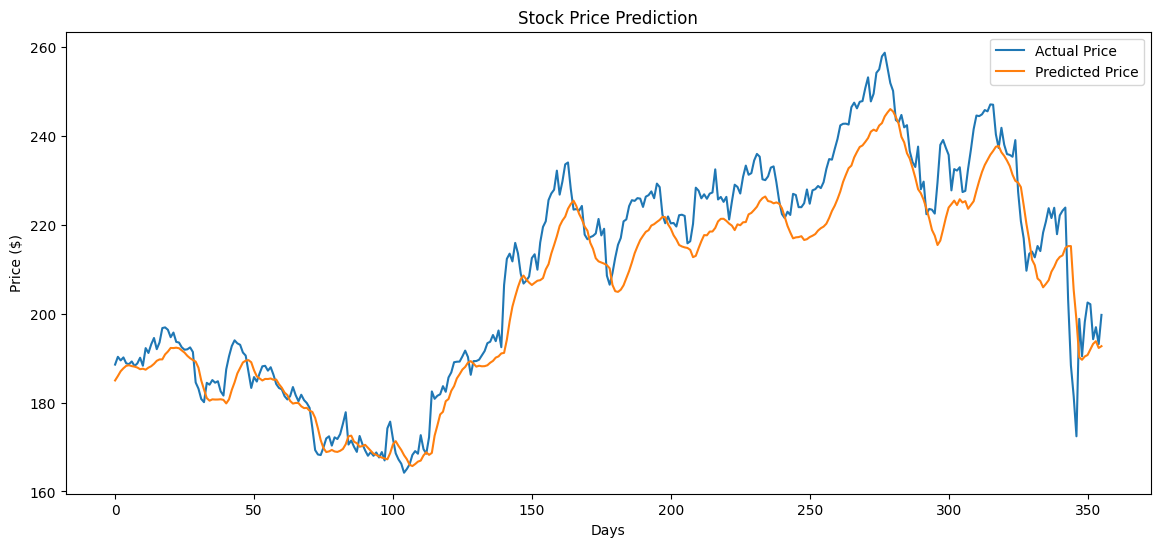

In [17]:
import matplotlib.pyplot as plt

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
